## Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data() # loading the dataset

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist # unpacking the dataset

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000] # training set
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:] # validation set

X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0 # normalizing the data points


In [3]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('float64'))

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
class_names[y_train[0]] # Ankle Boot

'Ankle Boot'

## Creating the model using Sequencial API

In [6]:
tf.keras.utils.set_random_seed(42) # setting an universal random seed

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),  # input layer
        tf.keras.layers.Dense(300, activation = 'relu'), # hidden layer 1
        tf.keras.layers.Dense(100, activation = 'relu'), # hidden layer 1
        tf.keras.layers.Dense(10, activation = 'softmax'), # output layer
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.layers # all layers built suceessfully

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

## Compiling the model

In [9]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

## Training and Evaluating the model

In [10]:
history = model.fit(X_train, y_train, epochs= 30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6778 - loss: 1.0128 - val_accuracy: 0.8298 - val_loss: 0.5026
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8244 - loss: 0.5103 - val_accuracy: 0.8418 - val_loss: 0.4472
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8414 - loss: 0.4558 - val_accuracy: 0.8472 - val_loss: 0.4233
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8526 - loss: 0.4247 - val_accuracy: 0.8540 - val_loss: 0.4090
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8594 - loss: 0.4027 - val_accuracy: 0.8570 - val_loss: 0.3977
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8659 - loss: 0.3853 - val_accuracy: 0.8598 - val_loss: 0.3905
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8704 - loss: 0.3710 - val_accuracy: 0.8594 - val_loss: 0.3851
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8740 - loss: 0.3584 - 

**Plotting the model's performance**

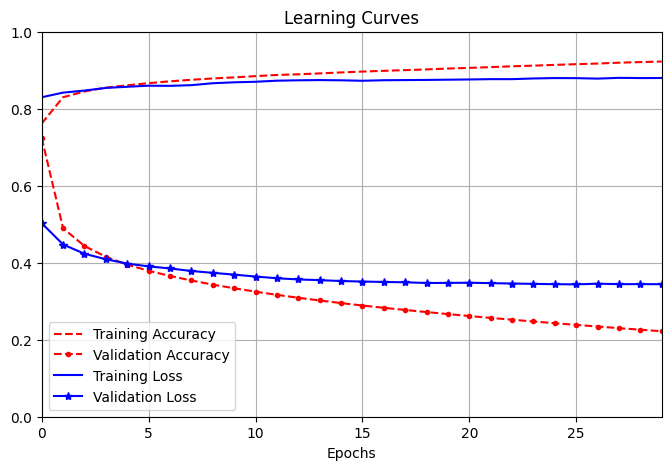

In [11]:
pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0.0, 1.0],
    xlabel='Epochs',
    style = ['r--', 'r--.', 'b-', 'b-*'],
    title = "Learning Curves"
)
plt.legend(['Training Accuracy', 'Validation Accuracy','Training Loss', 'Validation Loss'])
plt.grid(1)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.3603


[0.36193209886550903, 0.8748999834060669]

In [13]:
X_new = X_test[:3] # testing first 3 datapoints of the test set
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.01, 0.  , 0.67],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [14]:
y_pred = y_proba.argmax(axis=1)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')